# Laboratorio 3 de Inteligencia artificial - Clasificación de Imágenes mediante Aprendizaje No Supervisado

## Introducción

### Contexto y Motivación

En este laboratorio, nos enfocamos en la clasificación de imágenes mediante técnicas de aprendizaje no supervisado. A diferencia del aprendizaje supervisado, donde se requiere una gran cantidad de datos etiquetados, el aprendizaje no supervisado permite descubrir patrones y estructuras en los datos sin necesidad de etiquetas predefinidas. Esta característica es especialmente útil en escenarios donde la anotación manual de datos es costosa o impracticable.

### Objetivos del Proyecto

El objetivo principal de este proyecto es desarrollar un sistema capaz de clasificar imágenes de al menos tres tipos diferentes de objetos en diversas poses y entornos utilizando técnicas de aprendizaje no supervisado. 

### Metodología

El proyecto se desarrollará siguiendo una metodología sistemática, dividiendo el proceso en fases claramente definidas:

1. **Obtención y preprocesamiento de Imágenes**: Obtener 1000 imagenes por cada uno de los diferentes objetos e implementar técnicas de eliminación de ruido, normalización del tamaño y ajuste del contraste para mejorar la calidad de las imágenes antes de la extracción de características.
2. **Extracción y Selección de Características**: Utilizar técnicas avanzadas para extraer y seleccionar las características más relevantes que representen adecuadamente las imágenes para el aprendizaje no supervisado.
3. **Modelado y Agrupación**: Seleccionar y aplicar algoritmos de aprendizaje no supervisado como K-means, DBSCAN, entre otros, para agrupar las imágenes en clases distintas.
4. **Evaluación y Validación**: Evaluar la efectividad de los modelos utilizando métricas como cohesión intraclase y separación interclase, y validar los resultados para asegurar que los grupos obtenidos representan adecuadamente los diferentes tipos de objetos.

## Obtención de datos

Se descargan imagenes de ejemplo de internet mediante un script en python usando la libreria bing_image_downloader. Se busca tener un conjunto de datos robusto, para ello se define en 1000 la cantidad optima de muestras por objeto. Los 3 clases de objetos a usar son Coches, Manzanas, Perros.

El siguiente script cumple con la funcion de obtener las imagenes de las clases definidas.

In [7]:
from bing_image_downloader import downloader

downloader.download('perros',limit=120,output_dir='dataset',adult_filter_off=False
, force_replace=False, timeout=60)
downloader.download('frutas',limit=120,output_dir='dataset',adult_filter_off=False
, force_replace=False, timeout=60)
downloader.download('carros',limit=120,output_dir='dataset',adult_filter_off=False
, force_replace=False, timeout=60)

[%] Downloading Images to d:\Mis Documentos No Borrar\aj\Documents\AIFront\lab3\dataset\perros


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://supercurioso.com/wp-content/uploads/2019/06/Razas-de-Perros-Bonitos-del-Mundo.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://s-media-cache-ak0.pinimg.com/originals/fb/6d/16/fb6d16c4321ab45dad1c6290f2740f7a.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://3.bp.blogspot.com/-LCm03Qn-DwM/UkIdSLxm0HI/AAAAAAAB5rc/1bqRt-2ZcOw/s1600/dos-lindos-perritos--mascotas-dogs-bichon-frise-1920x1200-wallpaper-.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/4c/1e/28/4c1e28a388aa9f93ea088d5dc7ed3466.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://2.bp.blogspot.com/-RZTQYMq1M8U/T5P5uDFsgVI/AAAAAAAAh5c/XA5dJUCk4_A/s1600/wallpapers-perros-bulldogs-cachorros.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.telem

## Preprocesamiento de Imágenes

Se realizaron varias tareas de preprocesamiento de imágenes para preparar un conjunto de datos de imágenes con el objetivo de clasificarlas en diferentes categorías. Las imágenes fueron preprocesadas para eliminar el ruido, normalizar el tamaño y ajustar el contraste.

**Eliminar Ruido:** Se utilizó Median Blur para eliminar el ruido de las imagenes.

**Normalización del Tamaño:** Todas las imágenes se redimensionaron a un tamaño estándar de 128x128 píxeles.

**Conversión a Escala de Grises:** Las imágenes se convirtieron a escala de grises para simplificar el procesamiento posterior

**Ajuste del Contraste:** Se aplicó la equalización del histograma para mejorar el contraste de las imágenes en escala de grises:

Procesando: .\dataset\carros\Image_1.jpg
Procesando: .\dataset\carros\Image_10.jpg
Procesando: .\dataset\carros\Image_100.png
Procesando: .\dataset\carros\Image_101.jpeg
Procesando: .\dataset\carros\Image_102.jpg
Procesando: .\dataset\carros\Image_103.jpg
Procesando: .\dataset\carros\Image_104.jpg
Procesando: .\dataset\carros\Image_105.jpg
Procesando: .\dataset\carros\Image_106.jpg
Procesando: .\dataset\carros\Image_107.jpg
Procesando: .\dataset\carros\Image_108.jpg
Procesando: .\dataset\carros\Image_109.jpg
Procesando: .\dataset\carros\Image_11.JPG
Procesando: .\dataset\carros\Image_110.jpg
Procesando: .\dataset\carros\Image_111.jpg
Procesando: .\dataset\carros\Image_112.jpg
Procesando: .\dataset\carros\Image_113.png
Procesando: .\dataset\carros\Image_114.jpg
Procesando: .\dataset\carros\Image_115.jpg
Procesando: .\dataset\carros\Image_116.png
Procesando: .\dataset\carros\Image_117.jpg
Procesando: .\dataset\carros\Image_118.jpg
Procesando: .\dataset\carros\Image_119.jpg
Procesando: .\

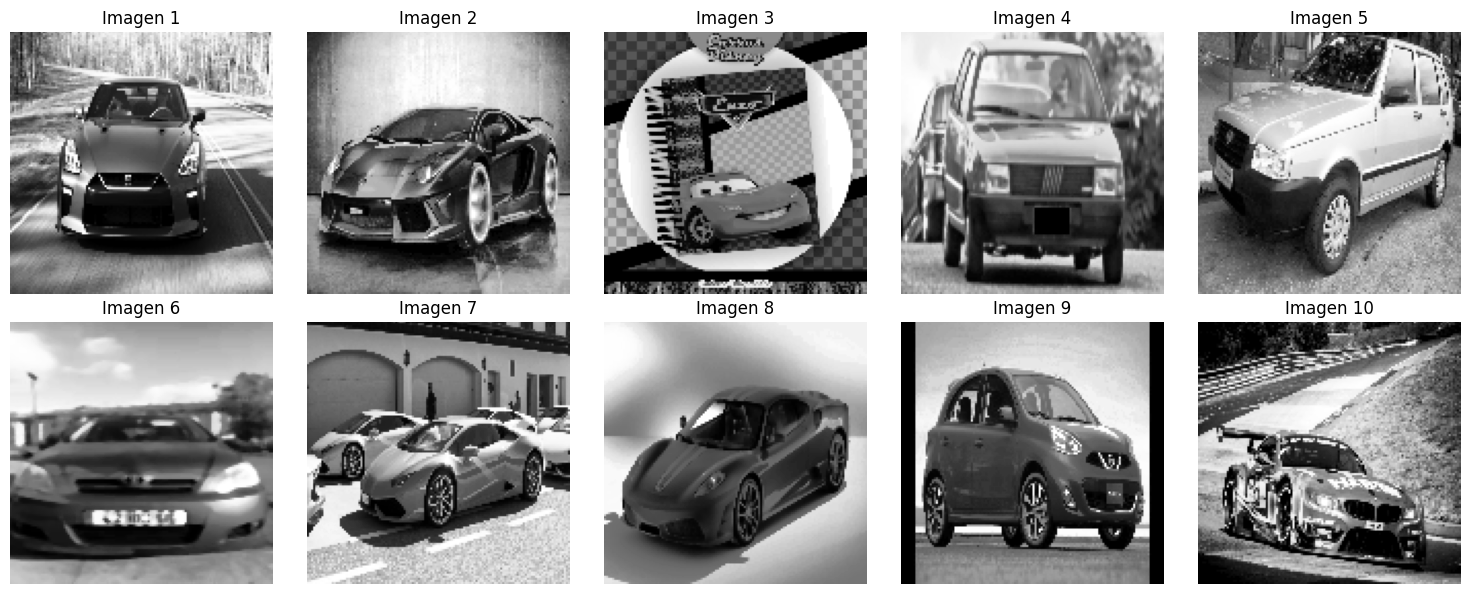

In [8]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_images(folder_path, size=(128, 128)):
    images = []
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                file_path = os.path.join(subfolder_path, filename)
                print(f"Procesando: {file_path}")  # Depuración
                img = cv2.imread(file_path)
                if img is not None:
                    img = cv2.medianBlur(img, 5)  # Eliminar ruido
                    img = cv2.resize(img, size)  # Normalizar tamaño
                    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    contrast_img = cv2.equalizeHist(gray_img)  # Ajustar contraste
                    images.append(contrast_img)
                else:
                    print(f"No se pudo leer la imagen: {file_path}")
    return np.array(images)

folder_path = '.\dataset'
images = load_and_preprocess_images(folder_path)

# Verificar si se cargaron imágenes
if len(images) == 0:
    print("No se encontraron imágenes. Verifica la ruta y los archivos.")
else:
    # Mostrar las primeras 10 imágenes preprocesadas
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()

    for i in range(10):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(f'Imagen {i+1}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

## Extracción de caracteristicas

Se utilizó la técnica de Histogramas de Gradientes Orientados (HOG) para extraer características de las imágenes preprocesadas. HOG es efectivo para capturar la estructura y forma de los objetos, lo que facilita la agrupación en clases y proporciona una representación robusta frente a variaciones de iluminación y pequeñas deformaciones.

In [65]:
def extract_flattened_features(images):
    features = []
    for img in images:
        feats = np.array(img).ravel() / 255.0  # Convertir a escala de grises y normalizar
        features.append(feats)
    return np.array(features)

feat = extract_flattened_features(images)

In [23]:
from skimage.feature import hog

def extract_hog_features(images):
    hog_features = []
    for img in images:
        features, _ = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        hog_features.append(features)
    return np.array(hog_features)

feat = extract_hog_features(images)

### Representacion HOG de las imagenes


Se extrajeron características HOG para 360 imágenes.


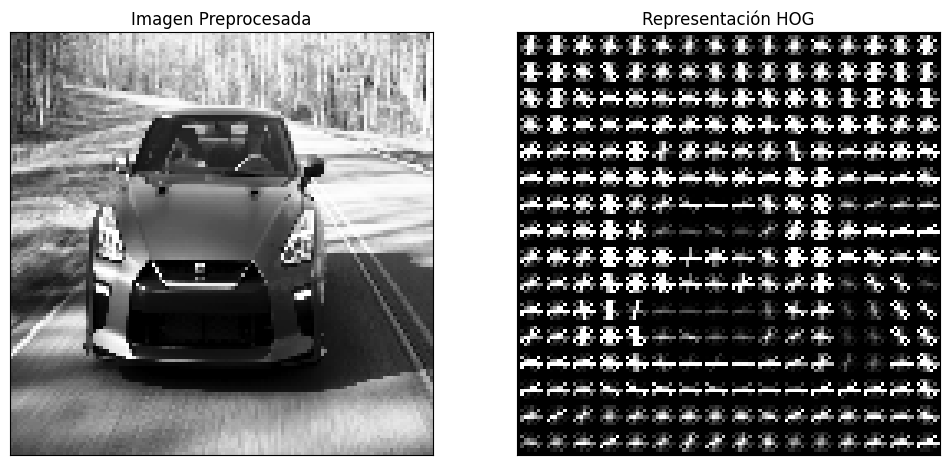

In [24]:

from skimage import exposure

# Verificar si se extrajeron características
if len(feat) == 0:
    print("No se extrajeron características. Verifica el proceso de preprocesamiento.")
else:
    print(f"Se extrajeron características HOG para {len(feat)} imágenes.")

    # Mostrar la primera imagen preprocesada y su representación HOG
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'xticks':[], 'yticks':[]})
    axes[0].imshow(images[0], cmap='gray')
    axes[0].set_title('Imagen Preprocesada')
    
    fd, hog_image = hog(images[0], orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    
    axes[1].imshow(hog_image_rescaled, cmap='gray')
    axes[1].set_title('Representación HOG')
    
    plt.show()

## Seleccion de caracteristicas

A continuacion se muestra 3 diferentes procesos de seleccion de caracteristicas: PCA + TSNE, PCA y KPCA

Solo debe aplicarse uno, en el informe final definir metodo de seleccion de caracteristicas

c:\Users\aj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\aj\AppData\Local\Temp\ipykernel_23448\2245375600.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(hog_features[:, 0], hog_features[:, 1], cmap='viridis', s=10)


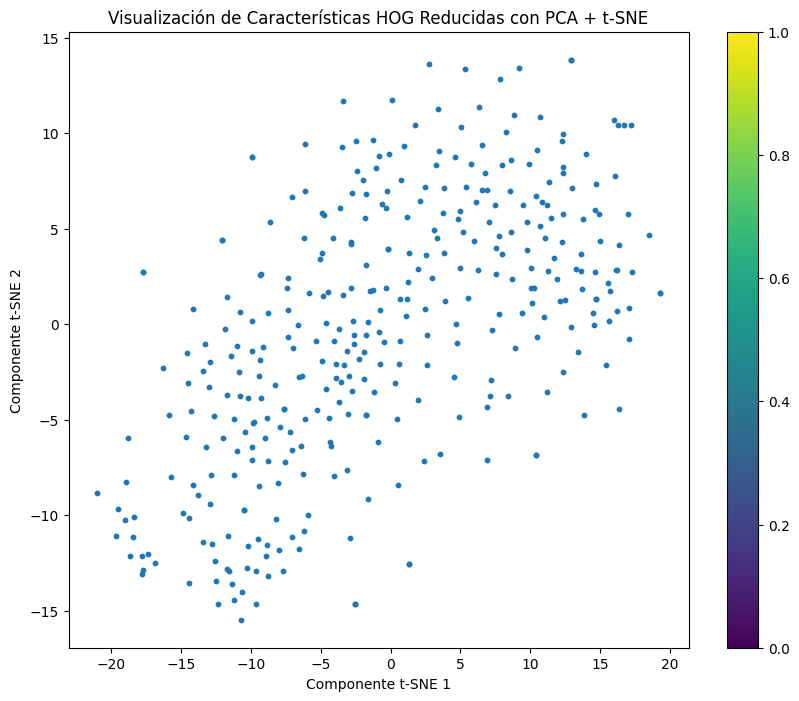

In [66]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Supongamos que `hog_features` es el conjunto de datos con las características HOG extraídas

# Paso 1: Reducción de dimensionalidad con PCA
pca = PCA(n_components=0.9)  # Reduce a 50 componentes principales
hog_features_pca = pca.fit_transform(feat)

# Paso 2: Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=3000, random_state=42, learning_rate=200, init='pca')
hog_features = tsne.fit_transform(hog_features_pca)

# Visualización de los datos reducidos
plt.figure(figsize=(10, 8))
plt.scatter(hog_features[:, 0], hog_features[:, 1], cmap='viridis', s=10)
plt.colorbar()
plt.title("Visualización de Características HOG Reducidas con PCA + t-SNE")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.show()


C:\Users\aj\AppData\Local\Temp\ipykernel_23448\4148877059.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(hog_features[:, 0], hog_features[:, 1], cmap='viridis', s=10)


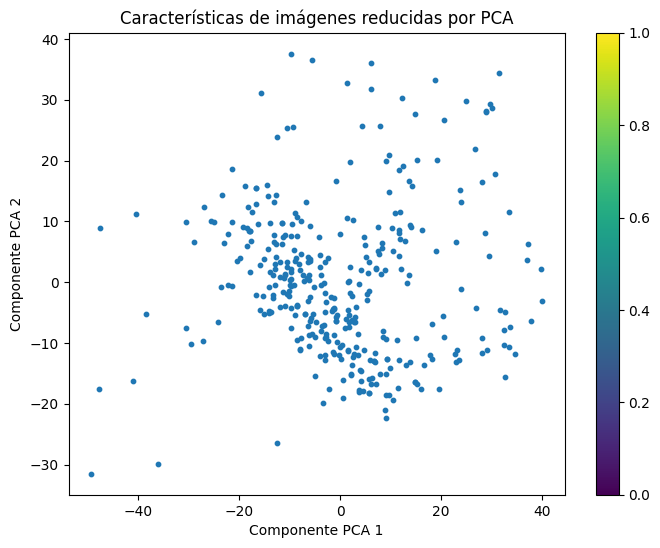

In [81]:
from sklearn.decomposition import PCA

# Crear instancia de PCA
pca = PCA(n_components=2)  # Especificar el número de componentes deseados

# Aplicar PCA a las características de las imágenes
hog_features = pca.fit_transform(feat)

# Visualización de las características reducidas por PCA
plt.figure(figsize=(8, 6))
plt.scatter(hog_features[:, 0], hog_features[:, 1], cmap='viridis', s=10)
plt.title("Características de imágenes reducidas por PCA")
plt.xlabel("Componente PCA 1")
plt.ylabel("Componente PCA 2")
plt.colorbar()
plt.show()


C:\Users\aj\AppData\Local\Temp\ipykernel_23448\3987108967.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(hog_features[:, 0], hog_features[:, 1], cmap='viridis', s=10)


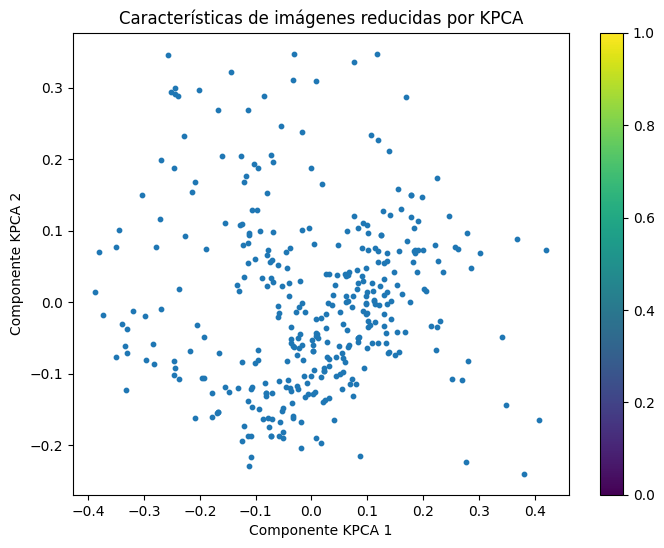

In [88]:
from sklearn.decomposition import KernelPCA

# Crear instancia de KPCA
kpca = KernelPCA(n_components=2, kernel='rbf')  # Especificar el número de componentes y el kernel deseado

# Aplicar KPCA a las características de las imágenes
hog_features = kpca.fit_transform(feat)

# Visualización de las características reducidas por KPCA
plt.figure(figsize=(8, 6))
plt.scatter(hog_features[:, 0], hog_features[:, 1], cmap='viridis', s=10)
plt.title("Características de imágenes reducidas por KPCA")
plt.xlabel("Componente KPCA 1")
plt.ylabel("Componente KPCA 2")
plt.colorbar()
plt.show()


## Seleccion de algoritmo

Se empezara evaluando con K-means por las siguientes razones:

* **Simplicidad y rapidez:** K-Means es sencillo de implementar y rápido de ejecutar, lo cual es útil para prototipado rápido.
* **Visualización:** Con t-SNE ya hemos reducido las características a 2D, lo que facilita la visualización de los clusters generados por K-Means.
* **Número de clusters conocido:** Sabemos que queremos clasificar las imágenes en tres categorías (carros, manzanas y perros), lo cual se adapta bien a K-Means.

K-means o DBSCAN

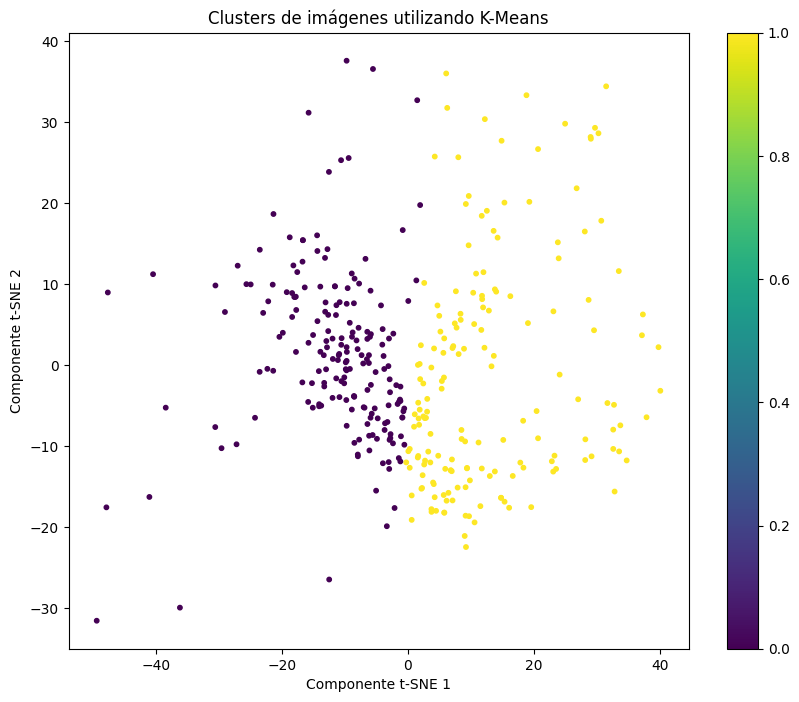


Imágenes del cluster 0:


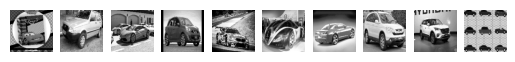


Imágenes del cluster 1:


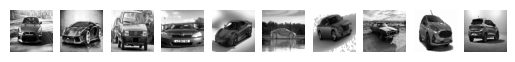

In [82]:
from sklearn.cluster import KMeans

# Aplicar K-Means con el número de clusters conocido (3 en este caso)
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(hog_features)
labels = kmeans.labels_

# Visualización de los clusters
plt.figure(figsize=(10, 8))
plt.scatter(hog_features[:, 0], hog_features[:, 1], c=labels, cmap='viridis', s=10)
plt.colorbar()
plt.title("Clusters de imágenes utilizando K-Means")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.show()

# Opcional: mostrar algunas imágenes de cada cluster
for cluster in range(num_clusters):
    print(f"\nImágenes del cluster {cluster}:")
    cluster_indices = np.where(labels == cluster)[0]
    for i, idx in enumerate(cluster_indices[:10]):  # Mostrar las primeras 10 imágenes de cada cluster
        plt.subplot(1, 10, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.axis('off')
    plt.show()

K-means demostro se ineficiente para este problema. A continuacion se prueba con DBSCAN

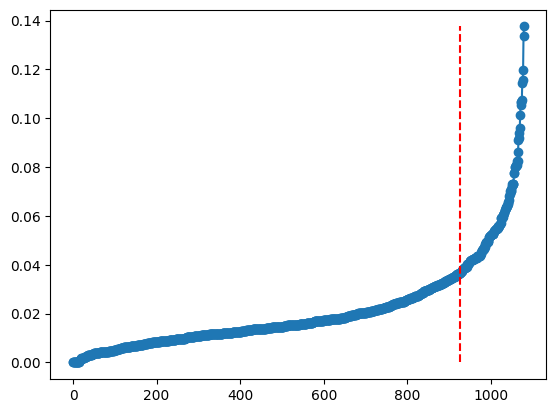

0.03660291072087985


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneebow.rotor import Rotor

#Calculamos la distancia k para determinar nuestro valor de eps.
def calculate_kn_distance (hog_features, neigh=2):
    neigh=NearestNeighbors(n_neighbors=neigh)
    nbrs=neigh.fit(hog_features)
    distances, indices=nbrs.kneighbors(hog_features)
    return distances[:,1:].reshape(-1)
    
#Obtenemos el valor exacto de eps utilizando kneebow, esta función nos permite 
#encontrar el codo de una curva rotando la curva y tomando el valor mínimo.
def get_eps (hog_features, neigh=2):
    eps_dist = np.sort(calculate_kn_distance(hog_features, neigh=neigh))
    rotor=Rotor()
    curve_xy= np.concatenate ([np.arange(eps_dist.shape[0]).reshape(-1, 1), eps_dist.reshape(-1, 1)],1) 
    rotor.fit_rotate(curve_xy)
    rotor.plot_elbow()
    e_idx= rotor.get_elbow_index()
    return curve_xy[e_idx]

distances= calculate_kn_distance(hog_features, neigh=4)
eps_dist = np.sort(distances)
plt.plot(eps_dist)

idx, eps=get_eps(hog_features,neigh=4)
#Mostrando la versión rotada utilizada para encontrar el codo.
plt.show()
#Imprimiendo los valores exactos de nuestro eps, desde aquí los redondearemos #y los usaremos para nuestro método DBSCAN.
print(eps)

En el codigo anterior se verifica cual es el valor de epsilon optimo

A continuacion una implementacion para este valor. Se puede ir experimentando con diferentes valores para min_samples

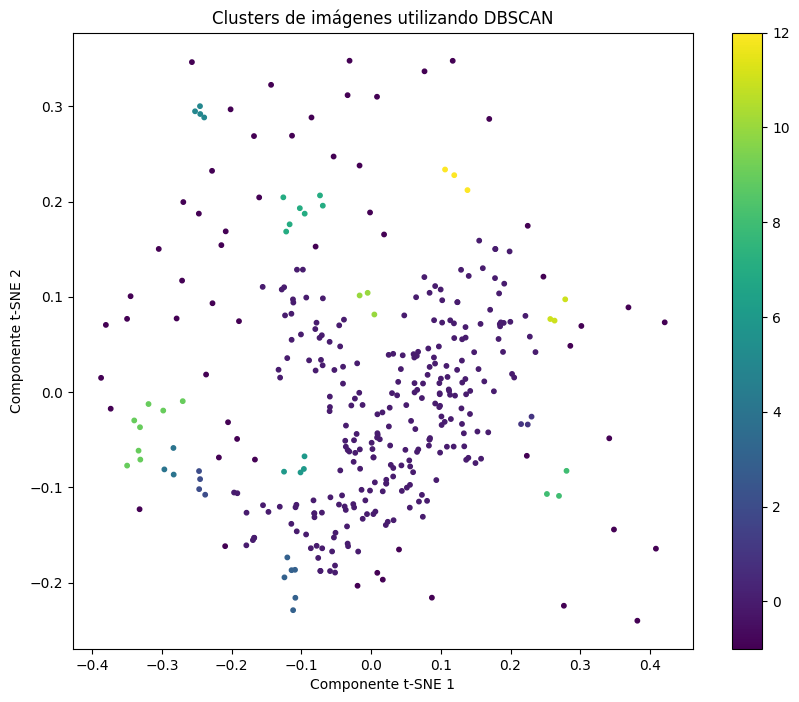


Imágenes del cluster 0:


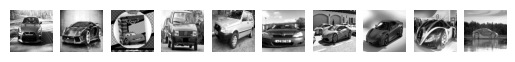


Imágenes del cluster 1:


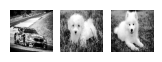


Imágenes del cluster 2:


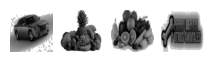


Imágenes del cluster 3:


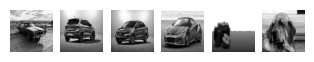


Imágenes del cluster 4:


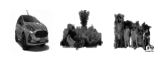


Imágenes del cluster 5:


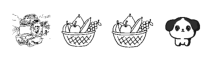


Imágenes del cluster 6:


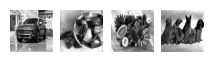


Imágenes del cluster 7:


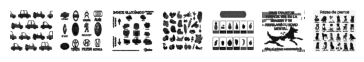


Imágenes del cluster 8:


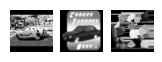


Imágenes del cluster 9:


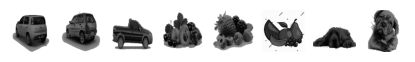


Imágenes del cluster 10:


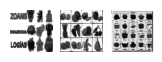


Imágenes del cluster 11:


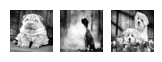


Imágenes del cluster 12:


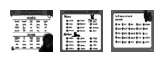


Imágenes clasificadas como ruido:


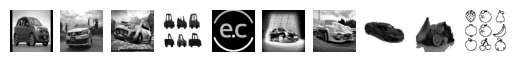

In [92]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.03, min_samples=3)  # Puedes ajustar los parámetros eps y min_samples
labels_dbscan = dbscan.fit_predict(hog_features)

# Visualización de los clusters
plt.figure(figsize=(10, 8))
plt.scatter(hog_features[:, 0], hog_features[:, 1], c=labels_dbscan, cmap='viridis', s=10)
plt.colorbar()
plt.title("Clusters de imágenes utilizando DBSCAN")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.show()

# Opcional: mostrar algunas imágenes de cada cluster
unique_labels = set(labels_dbscan)
for cluster in unique_labels:
    if cluster == -1:
        print("\nImágenes clasificadas como ruido:")
    else:
        print(f"\nImágenes del cluster {cluster}:")
    cluster_indices = np.where(labels_dbscan == cluster)[0]
    for i, idx in enumerate(cluster_indices[:10]):  # Mostrar las primeras 10 imágenes de cada cluster
        plt.subplot(1, 10, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.axis('off')
    plt.show()

A continuacion un algoritmo que prueba con diferentes valores de epsilon definidos

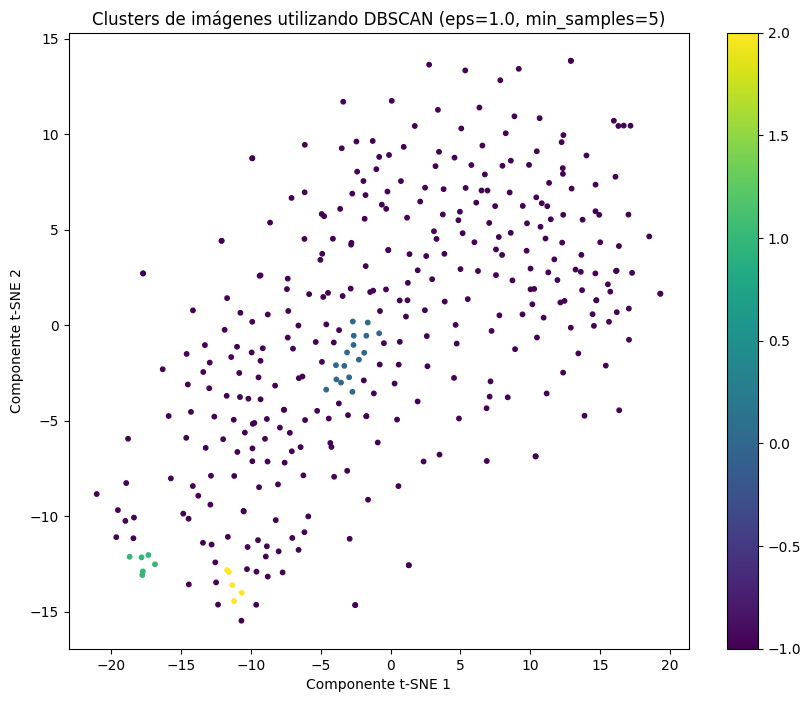


Imágenes del cluster 0:


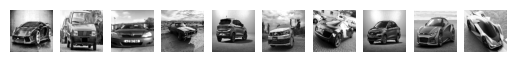


Imágenes del cluster 1:


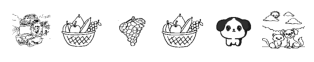


Imágenes del cluster 2:


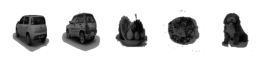


Imágenes clasificadas como ruido:


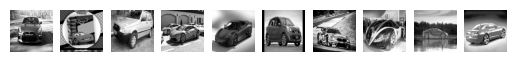

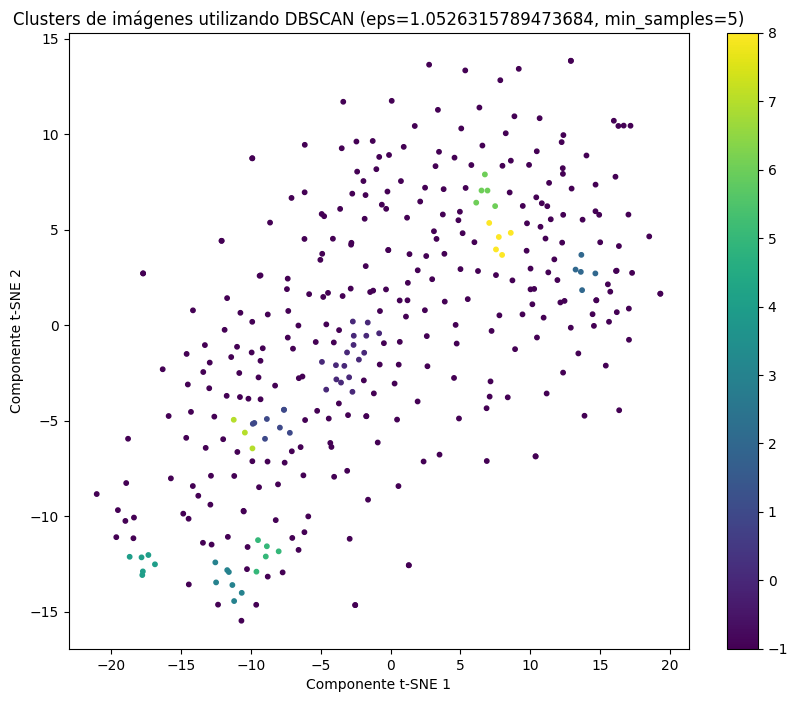


Imágenes del cluster 0:


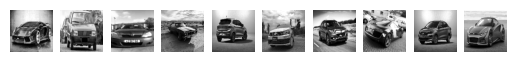


Imágenes del cluster 1:


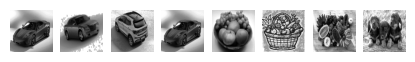


Imágenes del cluster 2:


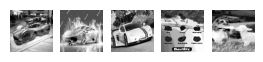


Imágenes del cluster 3:


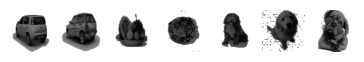


Imágenes del cluster 4:


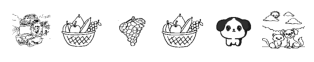


Imágenes del cluster 5:


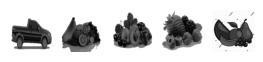


Imágenes del cluster 6:


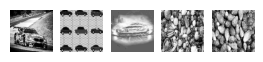


Imágenes del cluster 7:


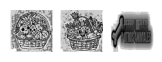


Imágenes del cluster 8:


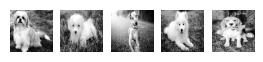


Imágenes clasificadas como ruido:


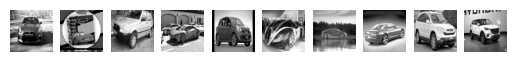

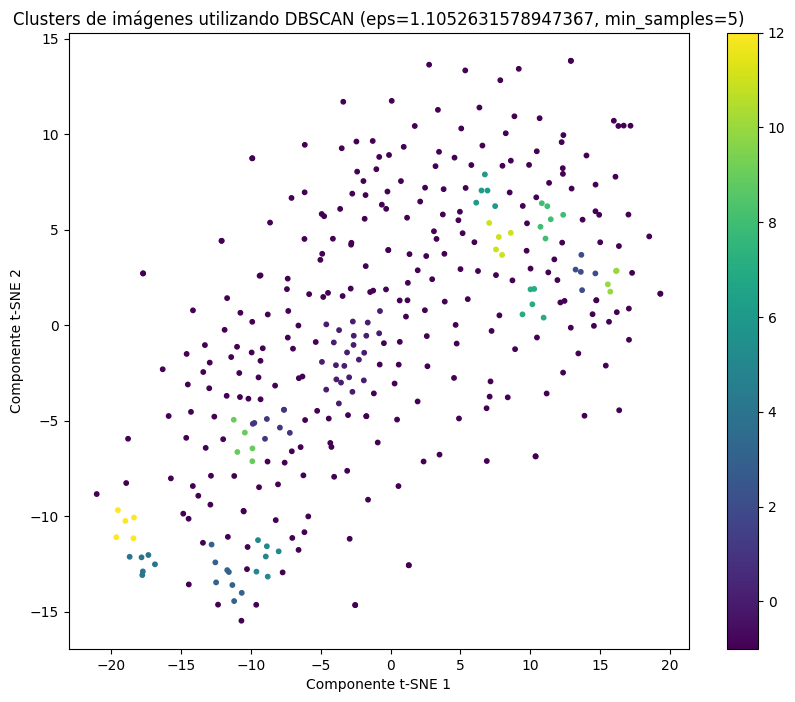


Imágenes del cluster 0:


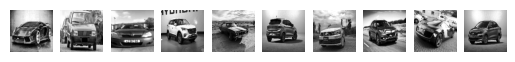


Imágenes del cluster 1:


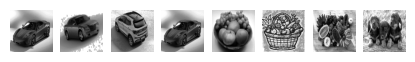


Imágenes del cluster 2:


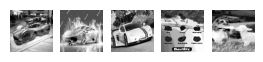


Imágenes del cluster 3:


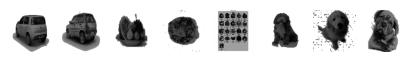


Imágenes del cluster 4:


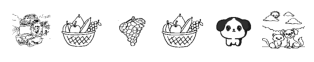


Imágenes del cluster 5:


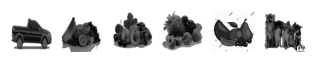


Imágenes del cluster 6:


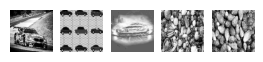


Imágenes del cluster 7:


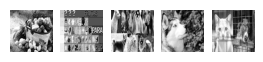


Imágenes del cluster 8:


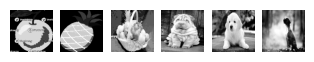


Imágenes del cluster 9:


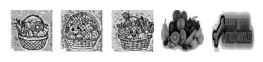


Imágenes del cluster 10:


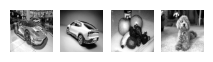


Imágenes del cluster 11:


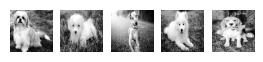


Imágenes del cluster 12:


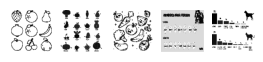


Imágenes clasificadas como ruido:


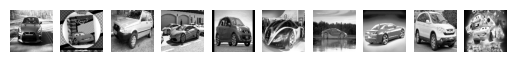

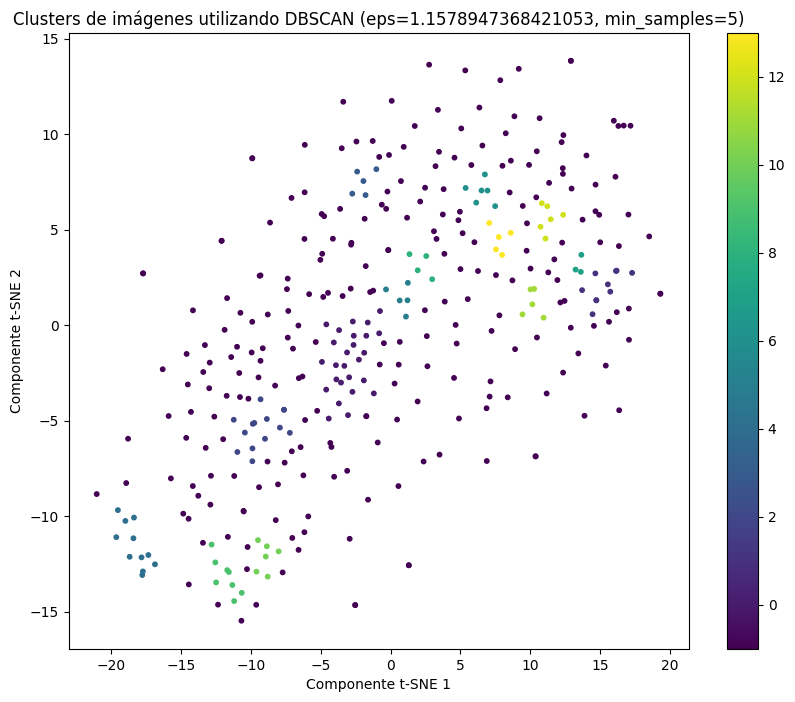


Imágenes del cluster 0:


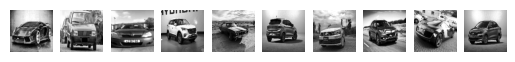


Imágenes del cluster 1:


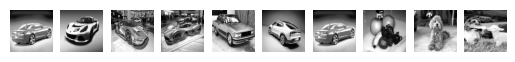


Imágenes del cluster 2:


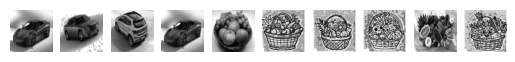


Imágenes del cluster 3:


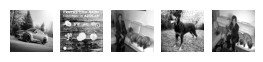


Imágenes del cluster 4:


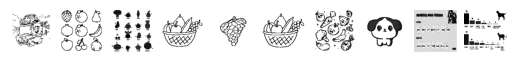


Imágenes del cluster 5:


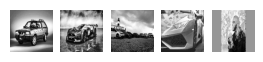


Imágenes del cluster 6:


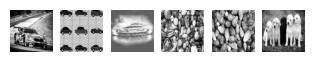


Imágenes del cluster 7:


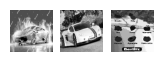


Imágenes del cluster 8:


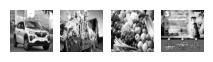


Imágenes del cluster 9:


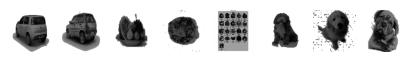


Imágenes del cluster 10:


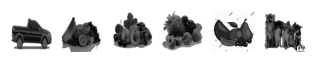


Imágenes del cluster 11:


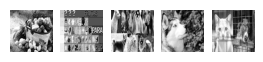


Imágenes del cluster 12:


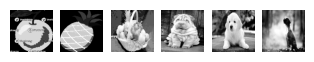


Imágenes del cluster 13:


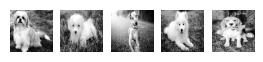


Imágenes clasificadas como ruido:


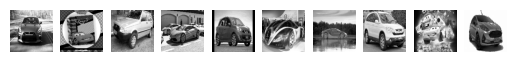

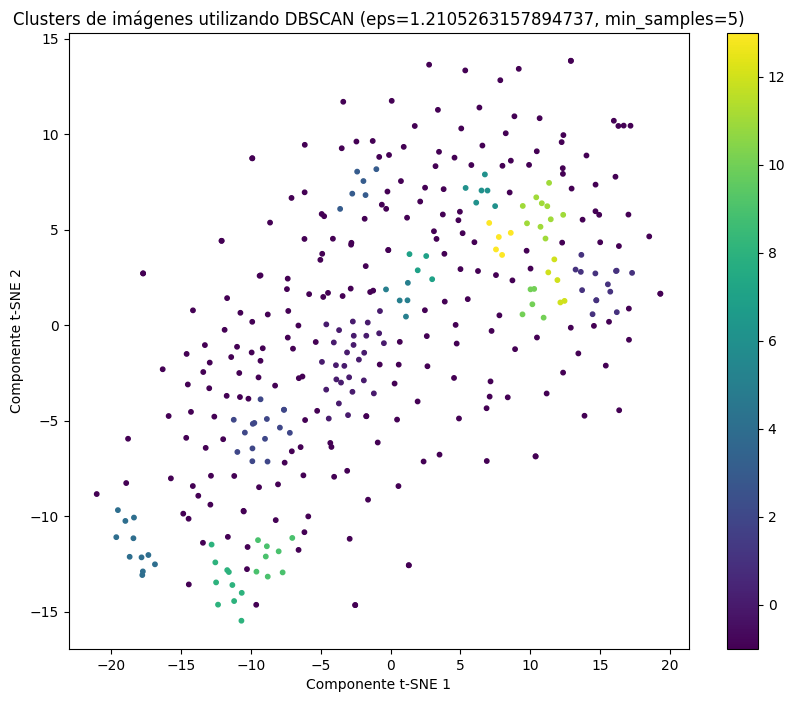


Imágenes del cluster 0:


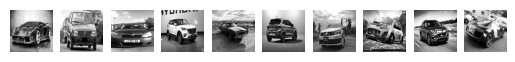


Imágenes del cluster 1:


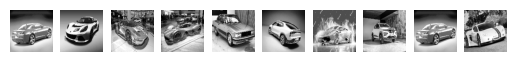


Imágenes del cluster 2:


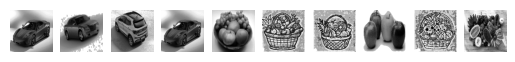


Imágenes del cluster 3:


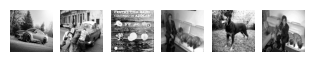


Imágenes del cluster 4:


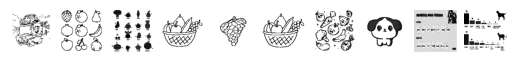


Imágenes del cluster 5:


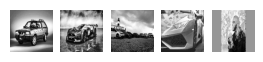


Imágenes del cluster 6:


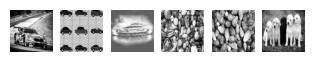


Imágenes del cluster 7:


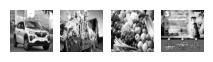


Imágenes del cluster 8:


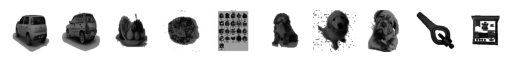


Imágenes del cluster 9:


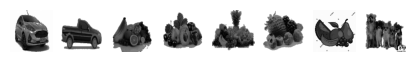


Imágenes del cluster 10:


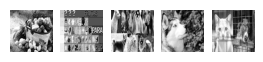


Imágenes del cluster 11:


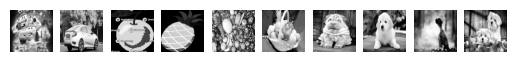


Imágenes del cluster 12:


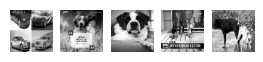


Imágenes del cluster 13:


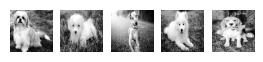


Imágenes clasificadas como ruido:


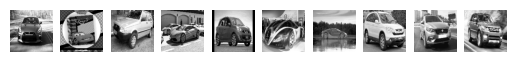

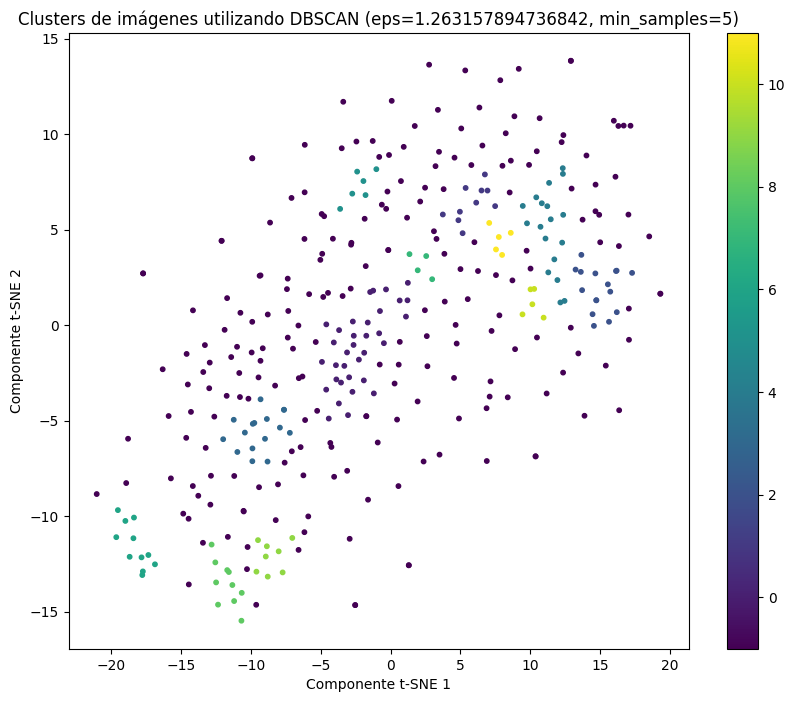


Imágenes del cluster 0:


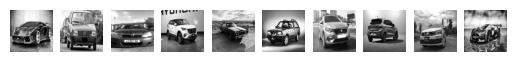


Imágenes del cluster 1:


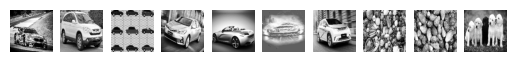


Imágenes del cluster 2:


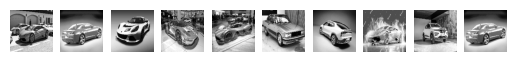


Imágenes del cluster 3:


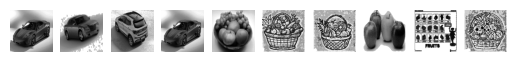


Imágenes del cluster 4:


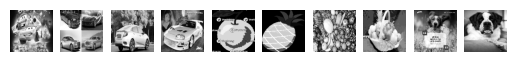


Imágenes del cluster 5:


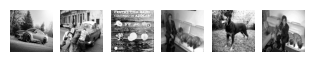


Imágenes del cluster 6:


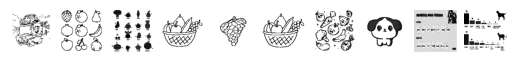


Imágenes del cluster 7:


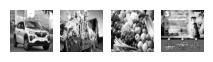


Imágenes del cluster 8:


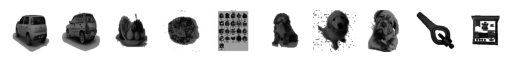


Imágenes del cluster 9:


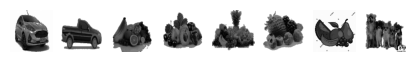


Imágenes del cluster 10:


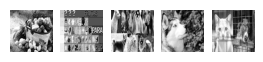


Imágenes del cluster 11:


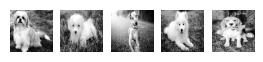


Imágenes clasificadas como ruido:


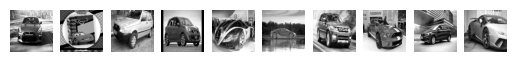

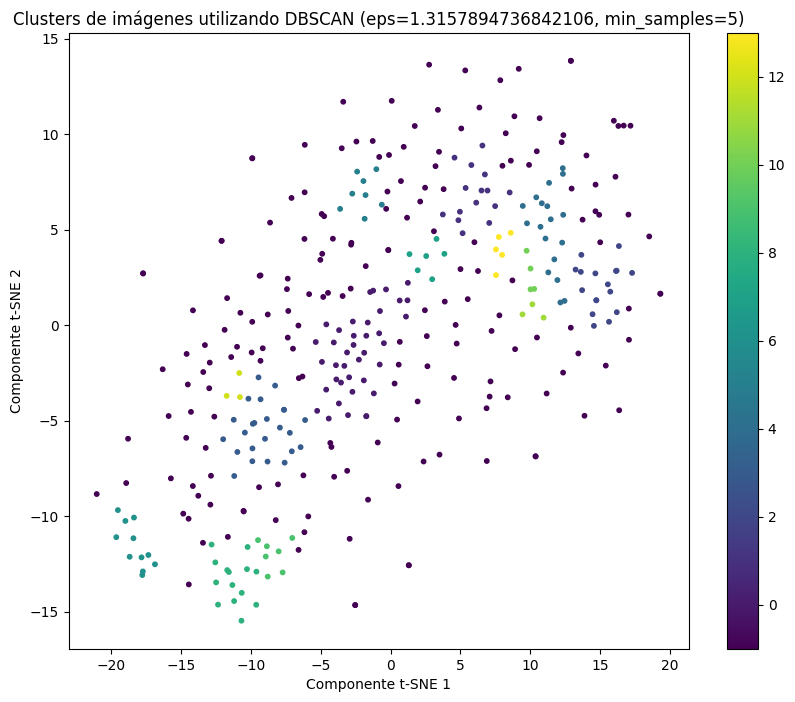


Imágenes del cluster 0:


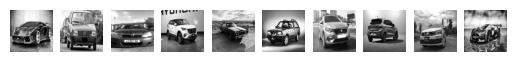


Imágenes del cluster 1:


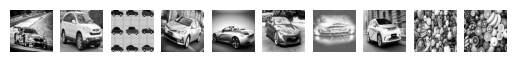


Imágenes del cluster 2:


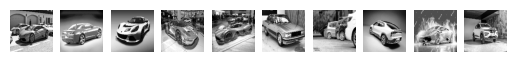


Imágenes del cluster 3:


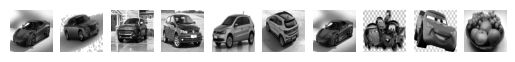


Imágenes del cluster 4:


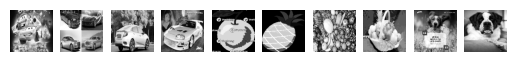


Imágenes del cluster 5:


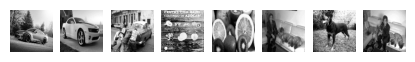


Imágenes del cluster 6:


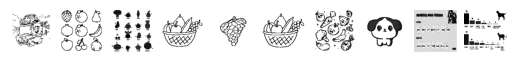


Imágenes del cluster 7:


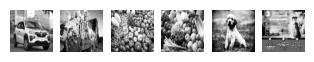


Imágenes del cluster 8:


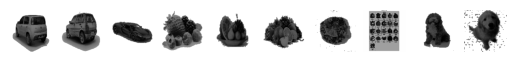


Imágenes del cluster 9:


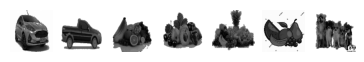


Imágenes del cluster 10:


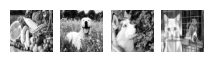


Imágenes del cluster 11:


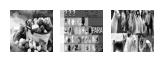


Imágenes del cluster 12:


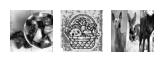


Imágenes del cluster 13:


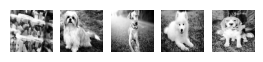


Imágenes clasificadas como ruido:


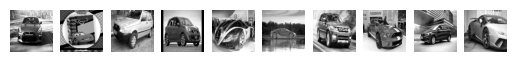

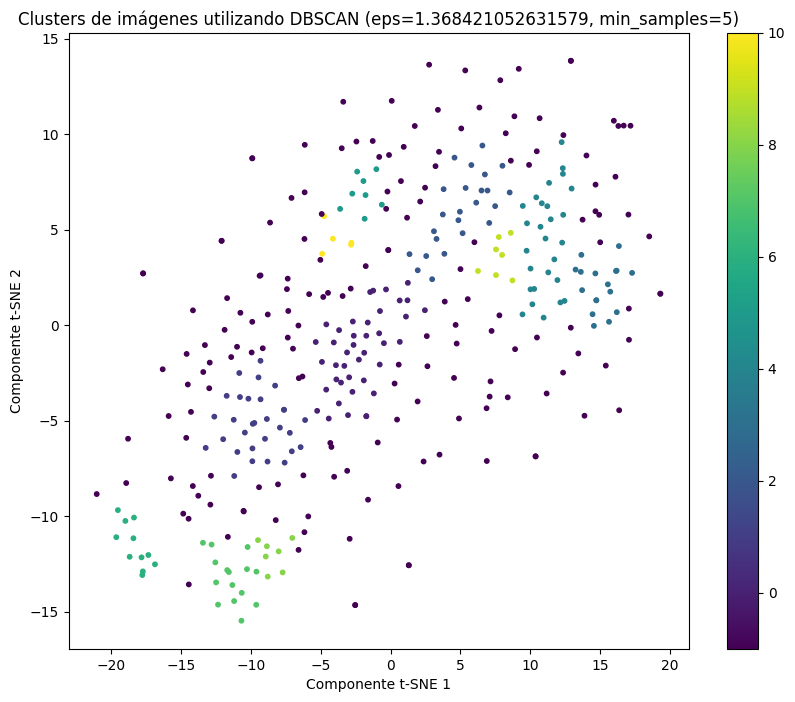


Imágenes del cluster 0:


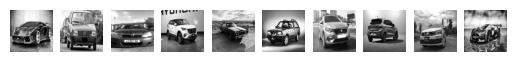


Imágenes del cluster 1:


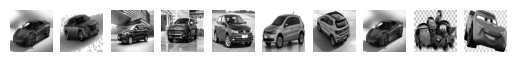


Imágenes del cluster 2:


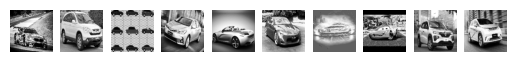


Imágenes del cluster 3:


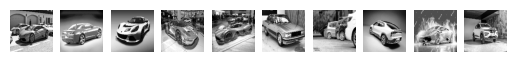


Imágenes del cluster 4:


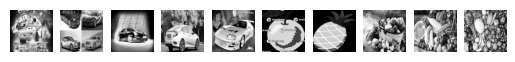


Imágenes del cluster 5:


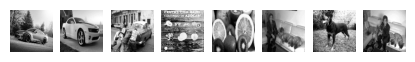


Imágenes del cluster 6:


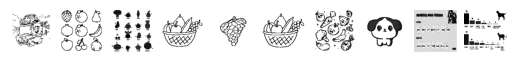


Imágenes del cluster 7:


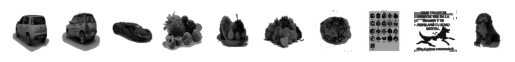


Imágenes del cluster 8:


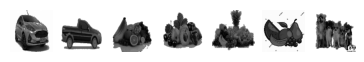


Imágenes del cluster 9:


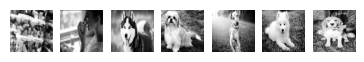


Imágenes del cluster 10:


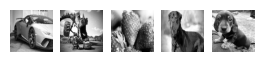


Imágenes clasificadas como ruido:


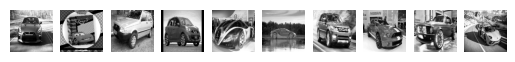

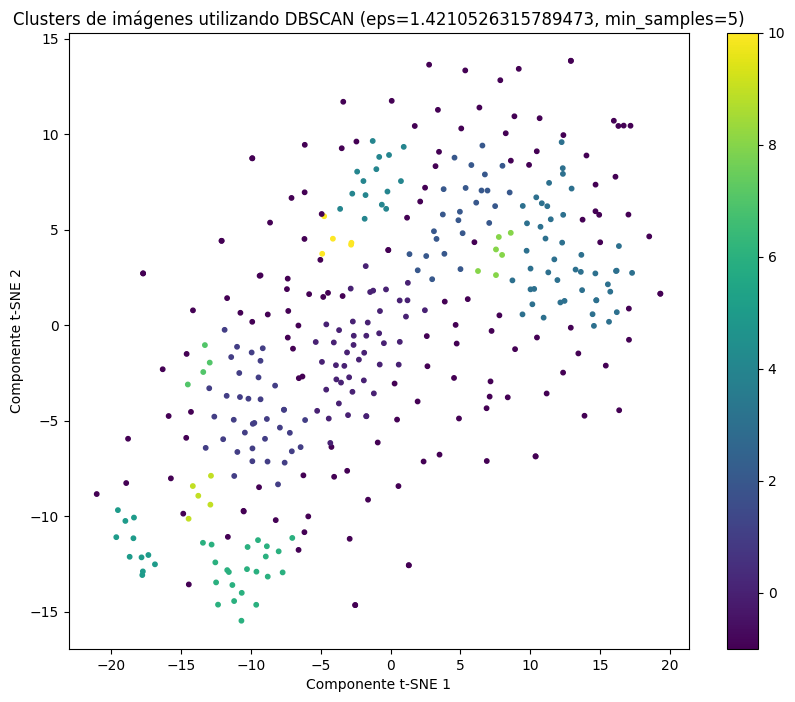


Imágenes del cluster 0:


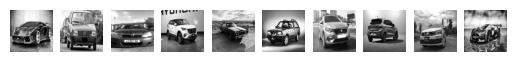


Imágenes del cluster 1:


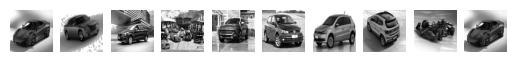


Imágenes del cluster 2:


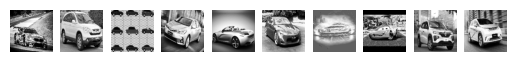


Imágenes del cluster 3:


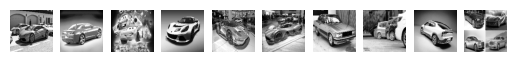


Imágenes del cluster 4:


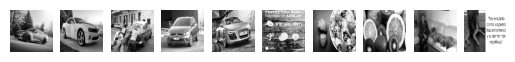


Imágenes del cluster 5:


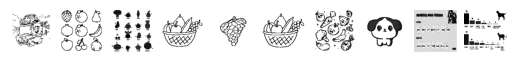


Imágenes del cluster 6:


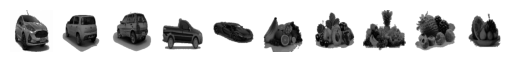


Imágenes del cluster 7:


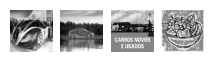


Imágenes del cluster 8:


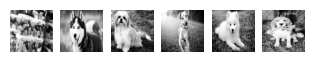


Imágenes del cluster 9:


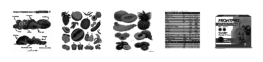


Imágenes del cluster 10:


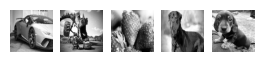


Imágenes clasificadas como ruido:


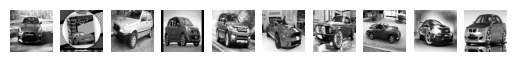

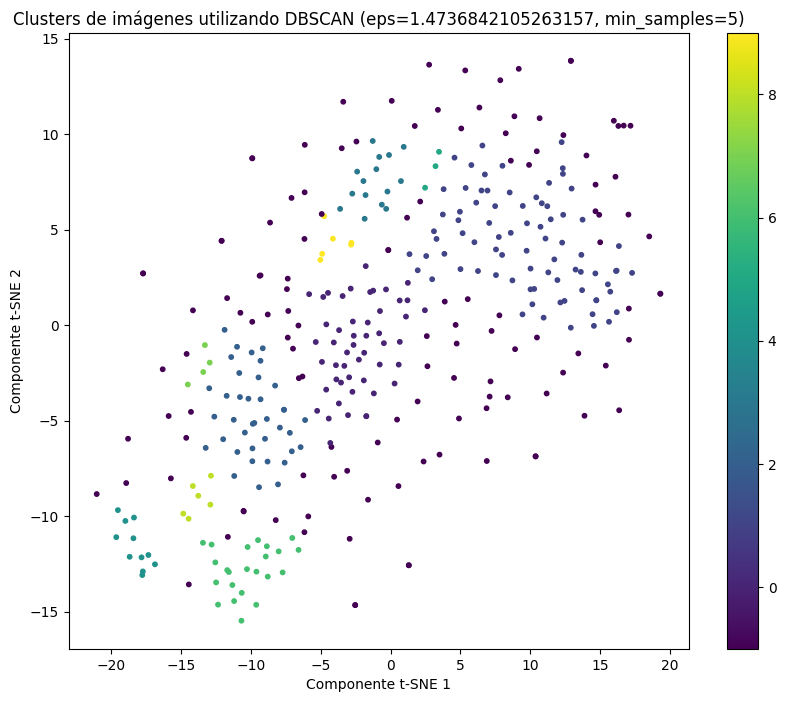


Imágenes del cluster 0:


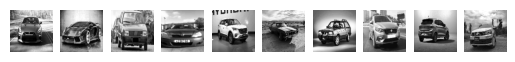


Imágenes del cluster 1:


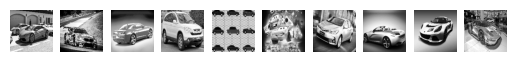


Imágenes del cluster 2:


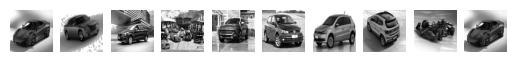


Imágenes del cluster 3:


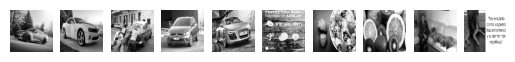


Imágenes del cluster 4:


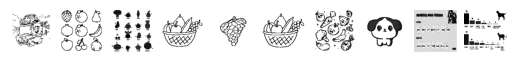


Imágenes del cluster 5:


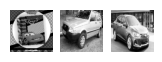


Imágenes del cluster 6:


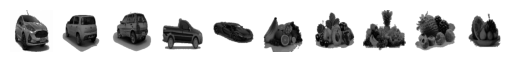


Imágenes del cluster 7:


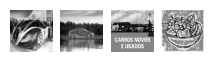


Imágenes del cluster 8:


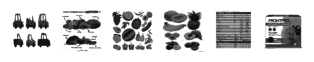


Imágenes del cluster 9:


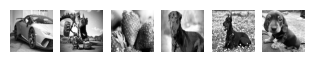


Imágenes clasificadas como ruido:


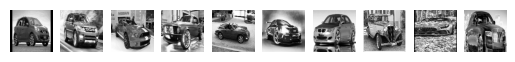

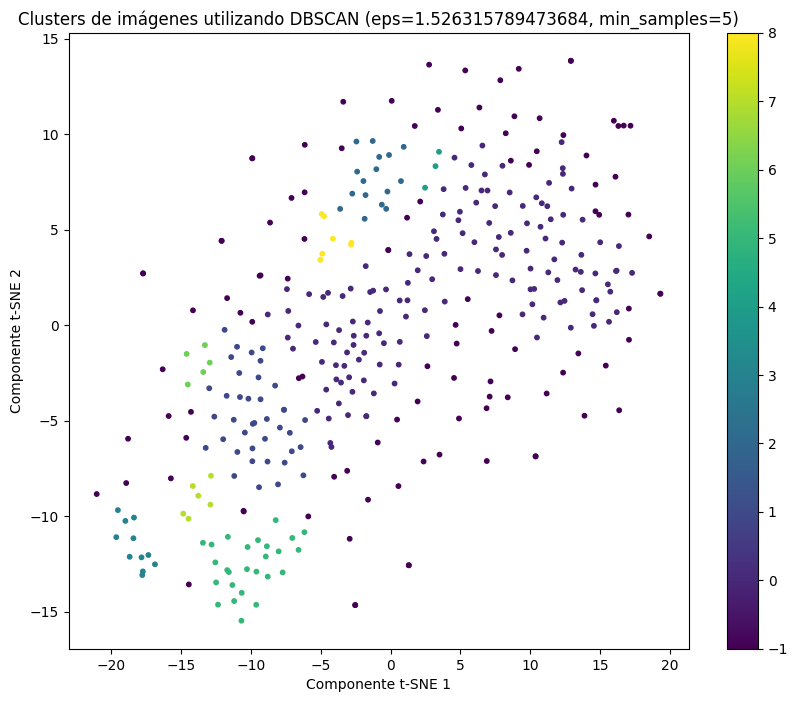


Imágenes del cluster 0:


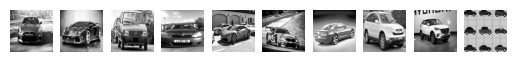


Imágenes del cluster 1:


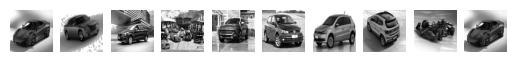


Imágenes del cluster 2:


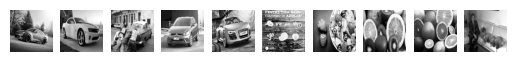


Imágenes del cluster 3:


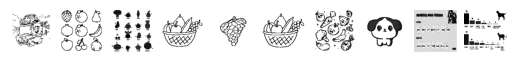


Imágenes del cluster 4:


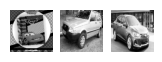


Imágenes del cluster 5:


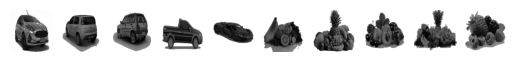


Imágenes del cluster 6:


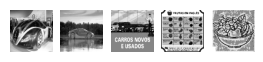


Imágenes del cluster 7:


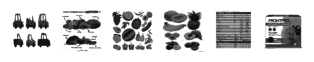


Imágenes del cluster 8:


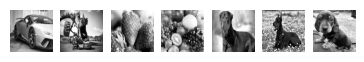


Imágenes clasificadas como ruido:


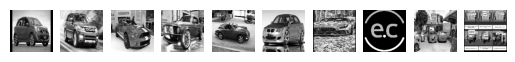

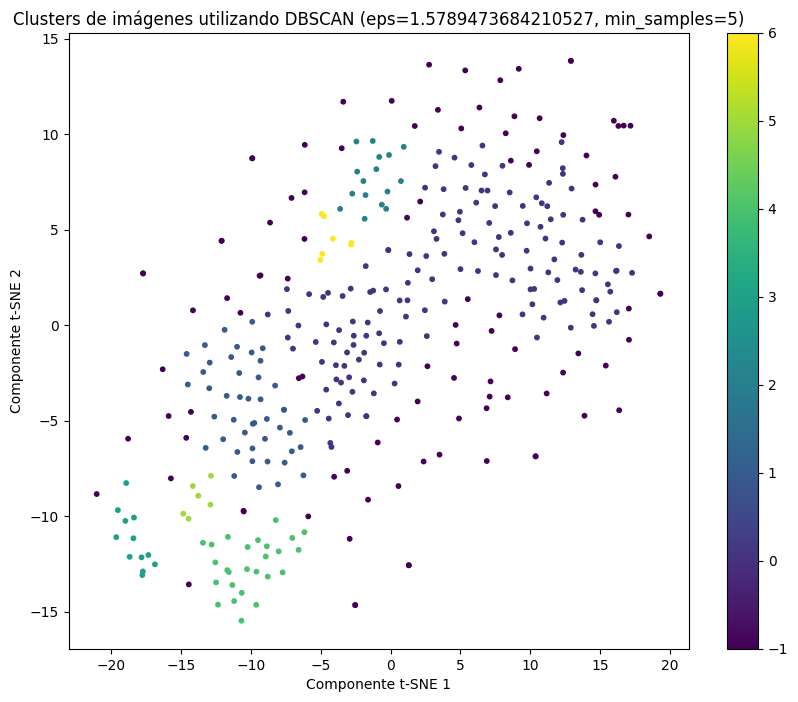


Imágenes del cluster 0:


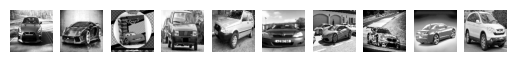


Imágenes del cluster 1:


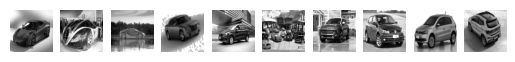


Imágenes del cluster 2:


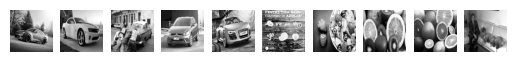


Imágenes del cluster 3:


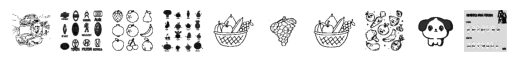


Imágenes del cluster 4:


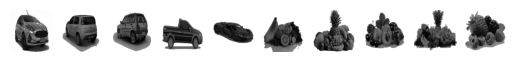


Imágenes del cluster 5:


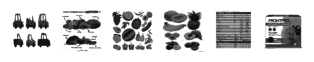


Imágenes del cluster 6:


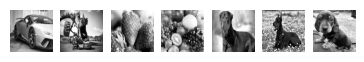


Imágenes clasificadas como ruido:


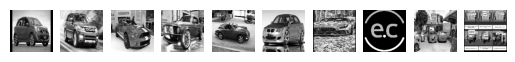

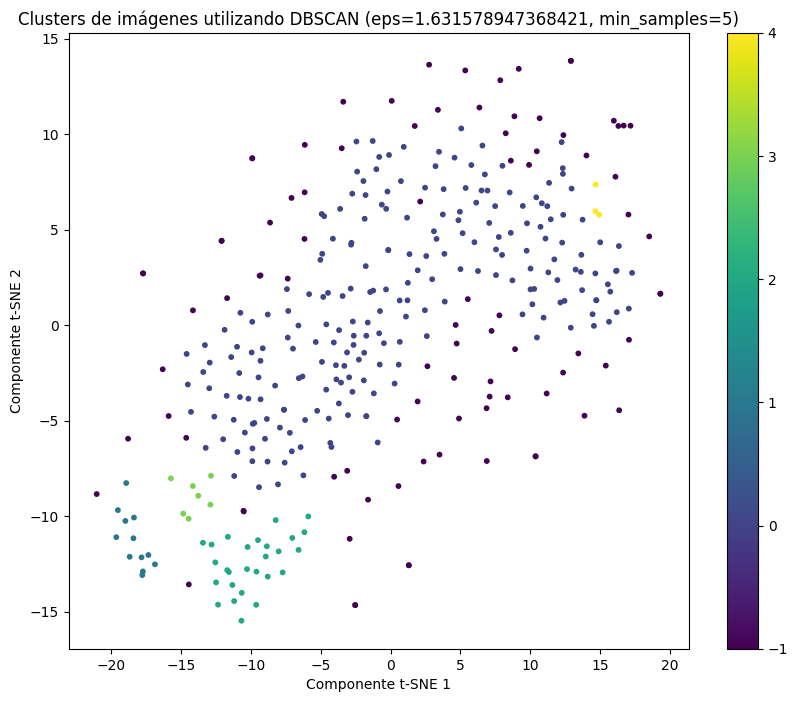


Imágenes del cluster 0:


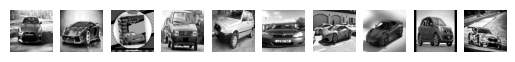


Imágenes del cluster 1:


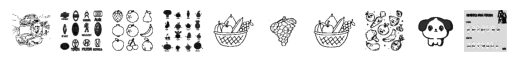


Imágenes del cluster 2:


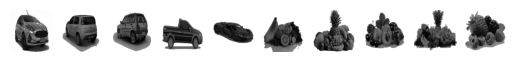


Imágenes del cluster 3:


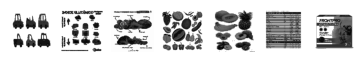


Imágenes del cluster 4:


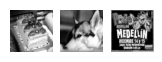


Imágenes clasificadas como ruido:


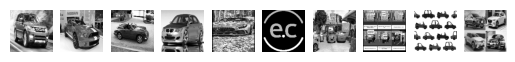

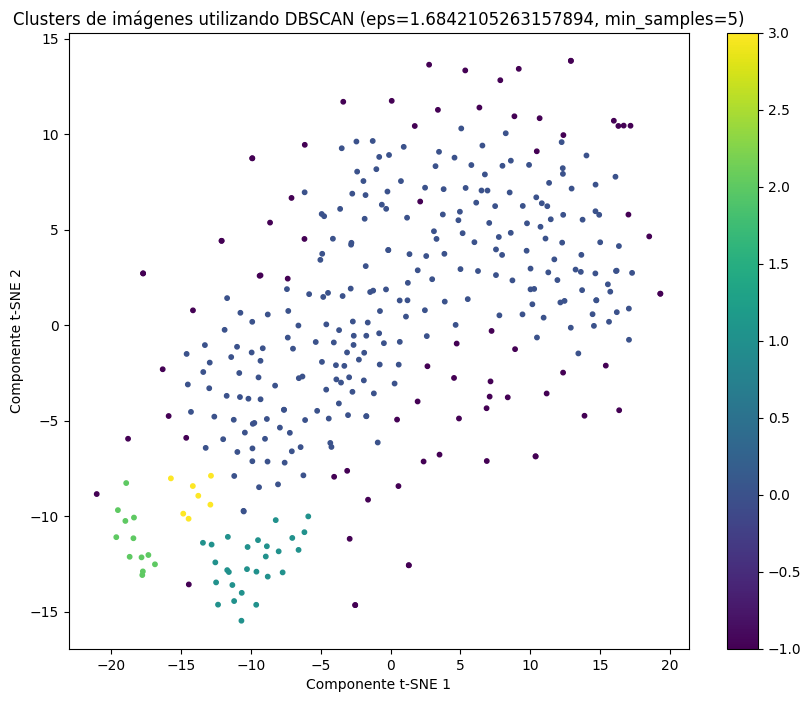


Imágenes del cluster 0:


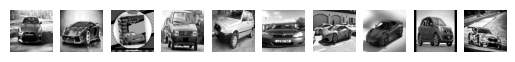


Imágenes del cluster 1:


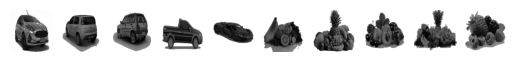


Imágenes del cluster 2:


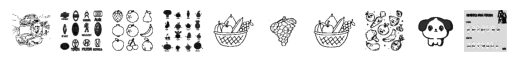


Imágenes del cluster 3:


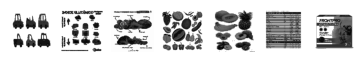


Imágenes clasificadas como ruido:


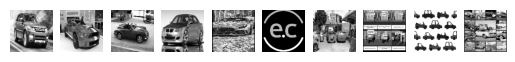

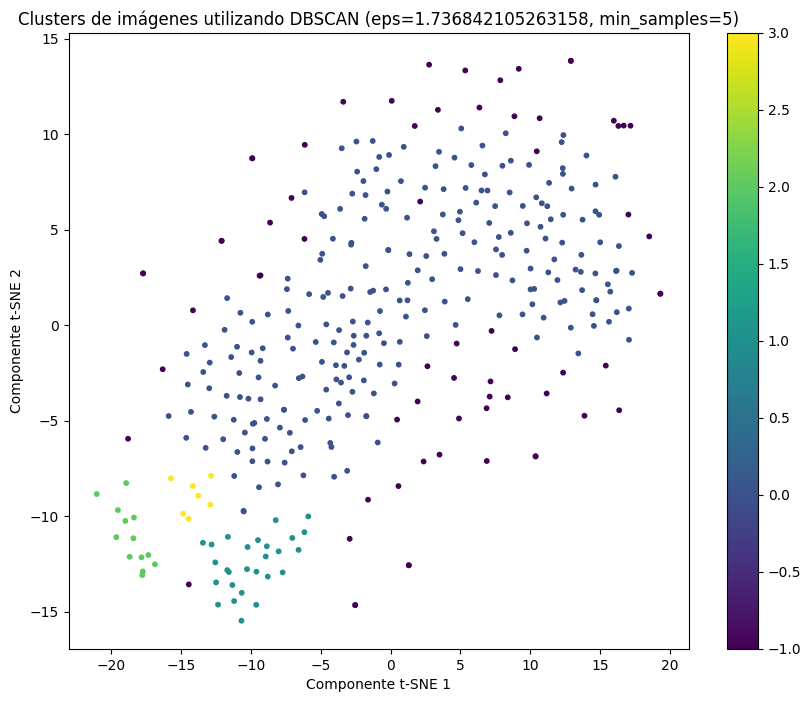


Imágenes del cluster 0:


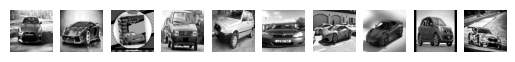


Imágenes del cluster 1:


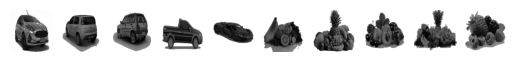


Imágenes del cluster 2:


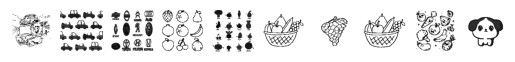


Imágenes del cluster 3:


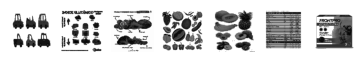


Imágenes clasificadas como ruido:


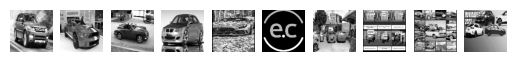

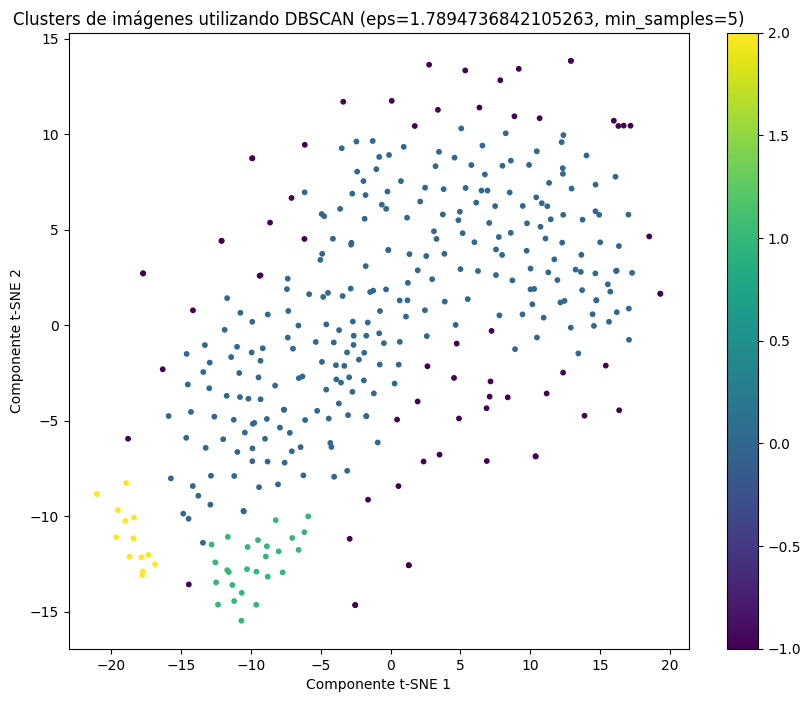


Imágenes del cluster 0:


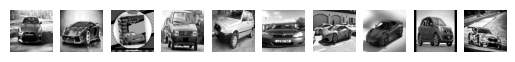


Imágenes del cluster 1:


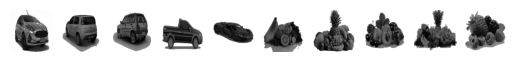


Imágenes del cluster 2:


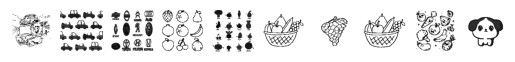


Imágenes clasificadas como ruido:


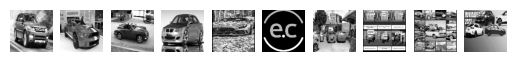

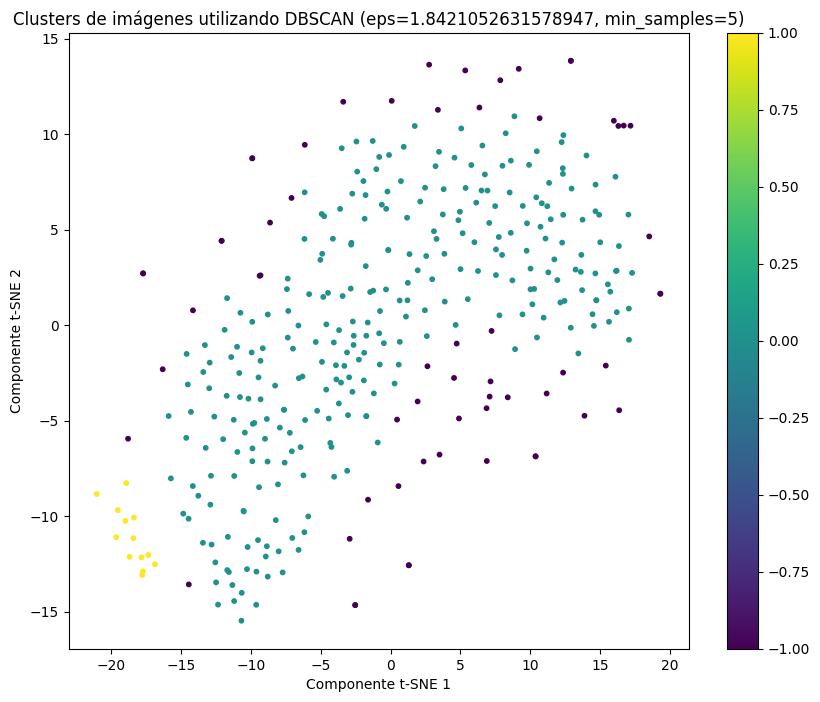


Imágenes del cluster 0:


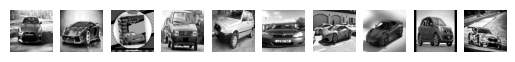


Imágenes del cluster 1:


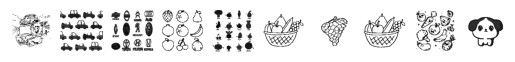


Imágenes clasificadas como ruido:


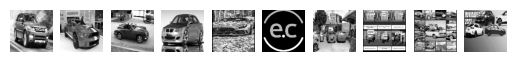

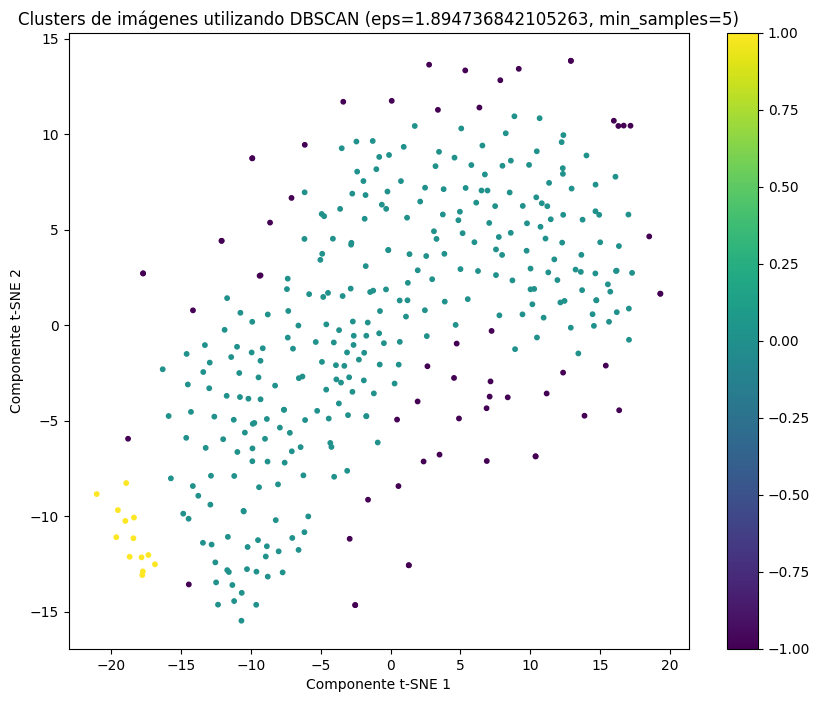


Imágenes del cluster 0:


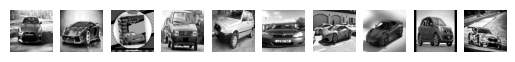


Imágenes del cluster 1:


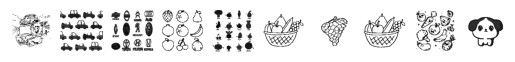


Imágenes clasificadas como ruido:


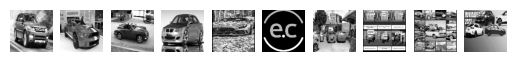

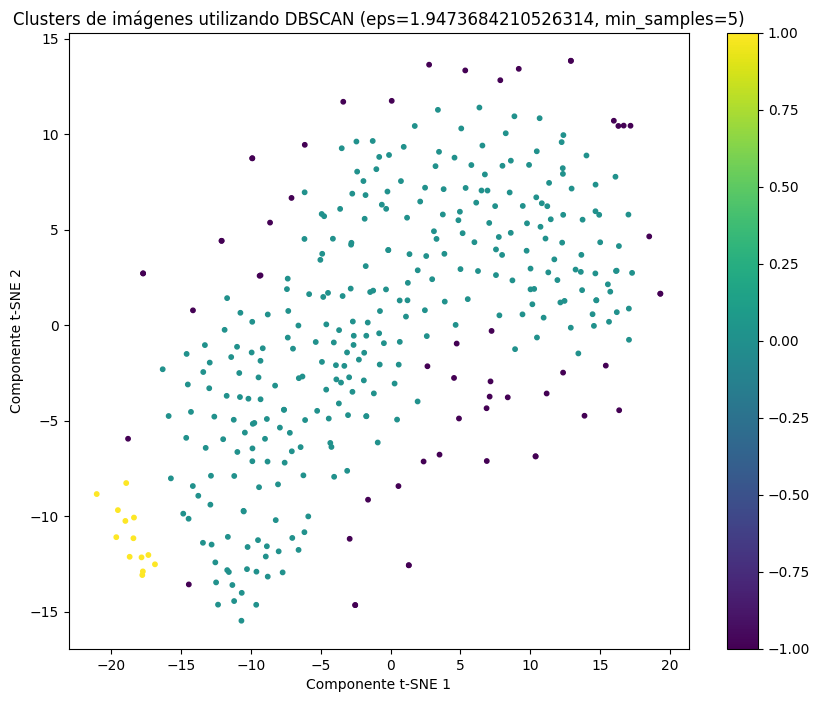


Imágenes del cluster 0:


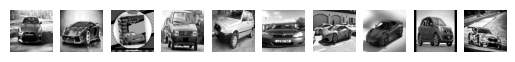


Imágenes del cluster 1:


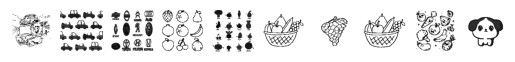


Imágenes clasificadas como ruido:


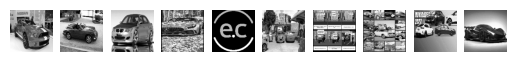

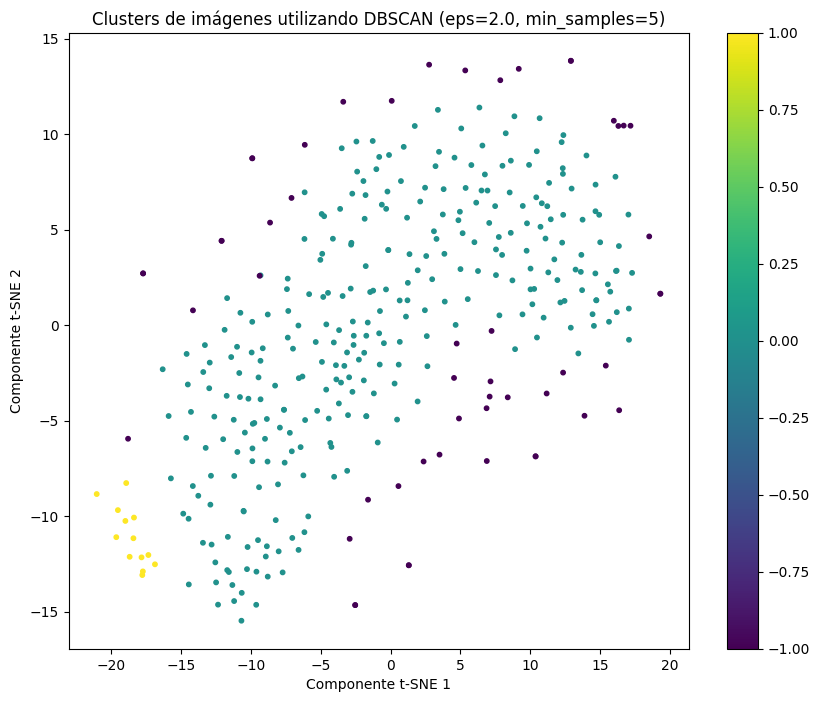


Imágenes del cluster 0:


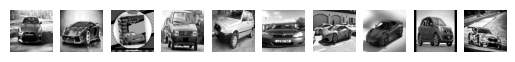


Imágenes del cluster 1:


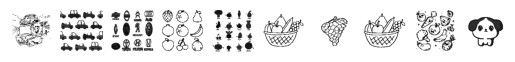


Imágenes clasificadas como ruido:


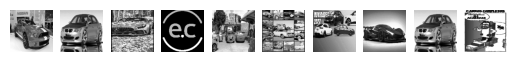

In [74]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Función para probar diferentes valores de eps y visualizar los resultados de DBSCAN
def try_dbscan(hog_features, eps_values, min_samples):
    for i, eps in enumerate(eps_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels_dbscan = dbscan.fit_predict(hog_features)

        plt.figure(figsize=(10, 8))
        plt.scatter(hog_features[:, 0], hog_features[:, 1], c=labels_dbscan, cmap='viridis', s=10)
        plt.colorbar()
        plt.title(f"Clusters de imágenes utilizando DBSCAN (eps={eps}, min_samples={min_samples})")
        plt.xlabel("Componente t-SNE 1")
        plt.ylabel("Componente t-SNE 2")
        plt.show()

        # Opcional: mostrar algunas imágenes de cada cluster
        unique_labels = set(labels_dbscan)
        for cluster in unique_labels:
            if cluster == -1:
                print("\nImágenes clasificadas como ruido:")
            else:
                print(f"\nImágenes del cluster {cluster}:")
            cluster_indices = np.where(labels_dbscan == cluster)[0]
            for i, idx in enumerate(cluster_indices[:10]):  # Mostrar las primeras 10 imágenes de cada cluster
                plt.subplot(1, 10, i + 1)
                plt.imshow(images[idx], cmap='gray')
                plt.axis('off')
            plt.show()

# Valores de eps a probar
eps_values = np.linspace(1, 2, 20)

# Número mínimo de muestras para DBSCAN
min_samples = 5

# Llamar a la función try_dbscan
try_dbscan(hog_features, eps_values, min_samples)
